### Deadline: 29.11 (Tuesday) 12:00 (noon)
**Group size: 2-3 persons.** <br>
**Assignments should be performed in this ipython notebook, saved and sent to vasilev@uni-koblenz.de, florian.lemmerich@gesis.org, philipp.singer@gesis.org with Subject: [ML-Assignment]**<br>
**You create groups on your own, names of all group participants should be mentioned in the letter.** 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## You are given 3 datasets df1, df2 and df3 with x,y as features and z as a class.

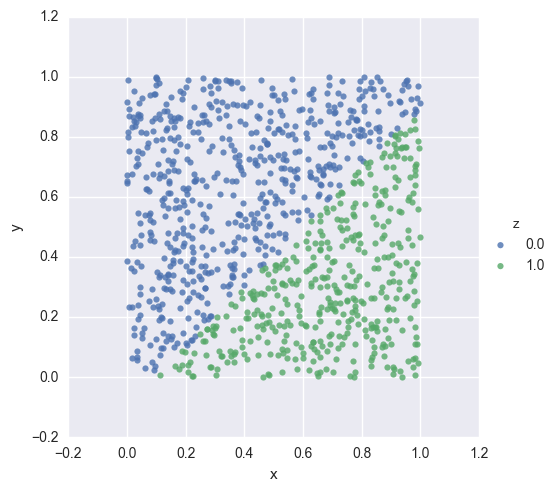

In [91]:
df1 = pd.DataFrame(index=range(1000), columns=["x","y","z"])
df1["x"] = np.random.rand(1000)
df1["y"] = np.random.rand(1000)
df1["z"] = np.array([ 1.0 if i > (j +0.1) else 0.0 for (i,j) in zip(df1.x, df1.y) ])
sns.lmplot(x="x", y="y", data=df1, hue='z', fit_reg=False)

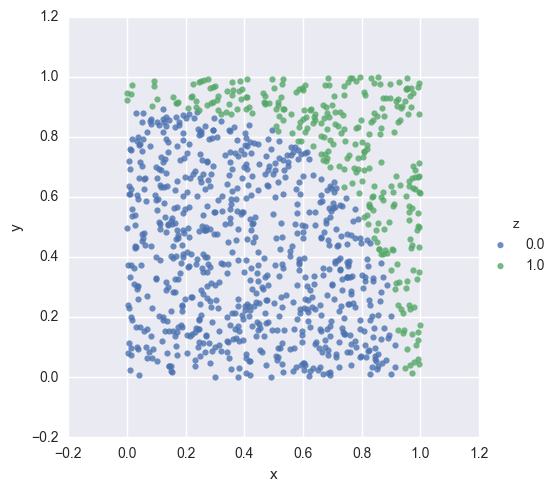

In [92]:
df2 = pd.DataFrame(index=range(1000), columns=["x","y","z"])
df2["x"] = np.random.rand(1000)
df2["y"] = np.random.rand(1000)
df2["z"] = np.array([ 1.0 if i**3 +j**2 > 0.8 else 0.0 for (i,j) in zip(df2.x, df2.y) ])
sns.lmplot(x="x", y="y", data=df2, hue='z', fit_reg=False)

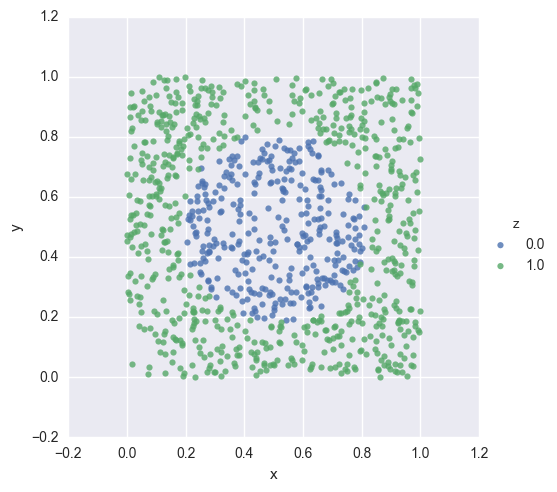

In [93]:
df3 = pd.DataFrame(index=range(1000), columns=["x","y","z"])
df3["x"] = np.random.rand(1000)
df3["y"] = np.random.rand(1000)
df3["z"] = np.array([ 1.0 if ((i-0.5)**2 + (j-0.5)**2) > 0.1 else 0.0 for (i,j) in zip(df3.x, df3.y) ])
sns.lmplot(x="x", y="y", data=df3, hue='z',fit_reg=False)

### 1) Apply SVM with different kernels to given datasets and visualize the results. In your visualizations, show the areas in the plane that get classified to a certain class (see http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py).

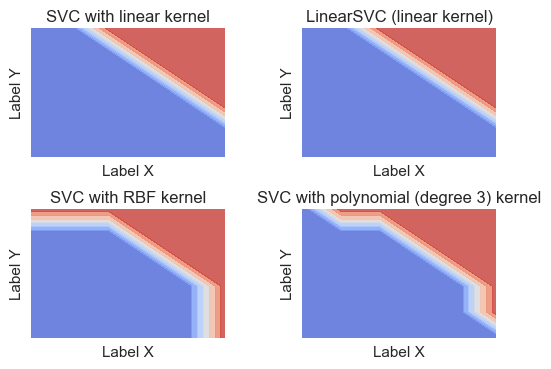

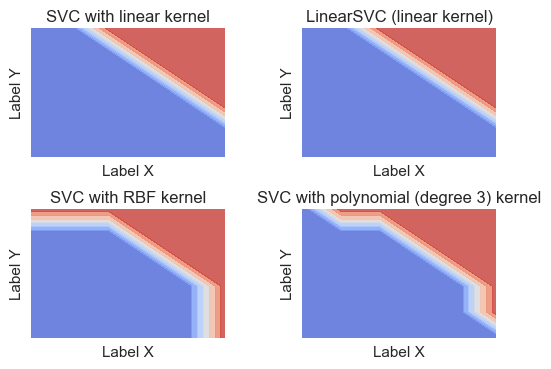

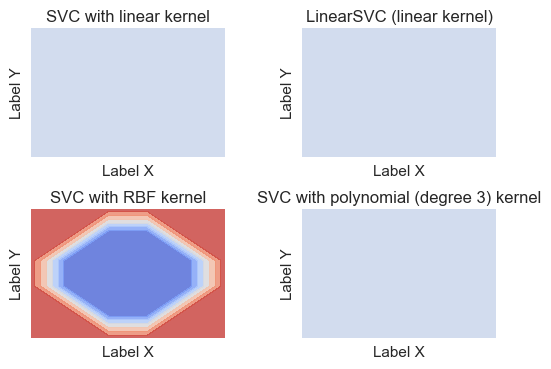

In [100]:
from sklearn.cross_validation import train_test_split
from sklearn import svm
# train_f, test_f, train_l, test_l = train_test_split(df1.drop('z', axis=1), df1['z'], test_size=0.3, 
#                                                     random_state=1, stratify=df1['z'])
def do_stuff(df1):
    C = 1.0
    svc = svm.SVC(kernel='linear', C=C).fit(df1.drop('z', axis=1), df1['z'])
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(df1.drop('z', axis=1), df1['z'])
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(df1.drop('z', axis=1), df1['z'])
    lin_svc = svm.LinearSVC(C=C).fit(df1.drop('z', axis=1), df1['z'])
    h = 0.2
    x_min, x_max = df1['x'].min() - 1, df1['x'].max() + 1
    y_min, y_max = df1['y'].min() - 1, df1['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
    #     plt.scatter(df1['x'], df1['y'], c=df1['z'], cmap=plt.cm.coolwarm)
        plt.xlabel('Label X')
        plt.ylabel('Label Y')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()
do_stuff(df1)
do_stuff(df2)
do_stuff(df3)


In [84]:
print(Z.shape)
print(test_f.shape)
print(type(test_f))

(15, 15)
(300, 2)
<class 'pandas.core.frame.DataFrame'>


In [85]:
df1['x'].min()

0.00029989994785573071

### 2) Compare accuracy of the results and choose the best fitting kernel for each dataset.

### 3) Explain (in words) for each dataset why a specific kernel performs best.

In [ ]:
Its just better. Its just better. Its just better. 